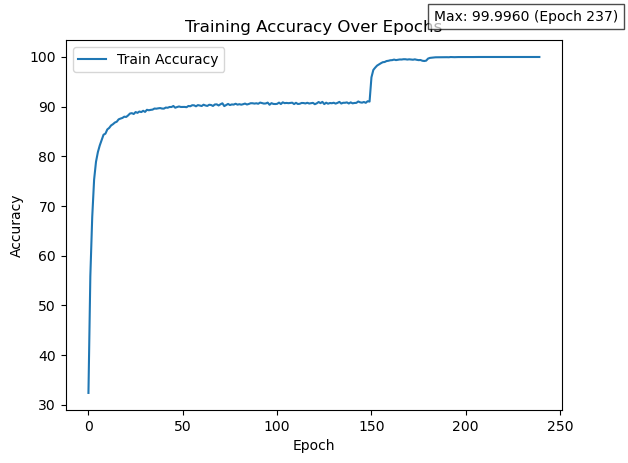

In [ ]:
import json
import matplotlib.pyplot as plt

filename = "../save/teachers/models/resnet32x4_vanilla_cifar10_trial_0_epochs_240_bs_64/train_acc_history.json"
filename = "../save/teachers/models/resnet32x4_vanilla_cifar10_trial_0_epochs_240_bs_64/train_acc_history.json"

# train_acc_history.jsonを読み込む
with open("../save/teachers/models/resnet32x4_vanilla_cifar10_trial_0_epochs_240_bs_64/train_acc_history.json", "r") as f:
    data = json.load(f)

train_acc = data["train_acc"]

# グラフを描画
plt.plot(train_acc, label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

# 最高値を枠外に表示
max_acc = max(train_acc)
max_epoch = train_acc.index(max_acc) + 1
plt.gcf().text(0.7, 0.92, f"Max: {max_acc:.4f} (Epoch {max_epoch})", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

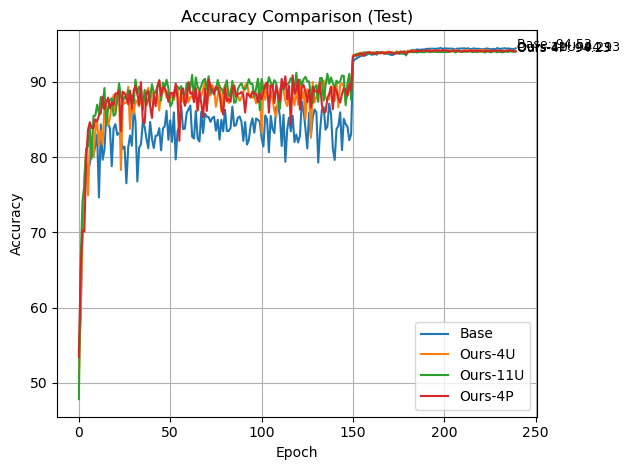

In [10]:
import json
import matplotlib.pyplot as plt
import os

# 比較したいファイルとラベルのリスト
files = {
    # "Teacher": "../save/teachers/models/resnet32x4_vanilla_cifar10_trial_0_epochs_240_bs_64/train_acc_history.json",
    "Base": "../save/students/models/S-vgg13_T-vgg13_cifar10_kd_r-1.0_a-1.0_b-400.0_0/test_acc_history.json",
    "Ours-4U": "../save/students/models/S-vgg13_T-vgg13_cifar10_ckad_r-1.0_a-1.0_b-400.0_0_Distill_gn-4_me-mean_red-mean_sgrp-uniform/test_acc_history.json",
    "Ours-11U":   "../save/students/models/S-vgg13_T-vgg13_cifar10_ckad_r-1.0_a-1.0_b-400.0_0_Distill_gn-11_me-mean_red-mean_sgrp-uniform/test_acc_history.json",
    "Ours-4P":  "../save/students/models/S-vgg13_T-vgg13_cifar10_ckad_r-1.0_a-1.0_b-400.0_0_Distill_gn-4_me-mean_red-mean_sgrp-proportional/test_acc_history.json",
}
# グラフ描画
for label, path in files.items():
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    with open(path, "r") as f:
        data = json.load(f)
    if label == "Teacher":
        acc = data["train_acc"]
    else:
        acc = data["test_acc"]
    plt.plot(acc, label=label)
    
    # 各系列の最大値を注記（オプション）
    max_acc = max(acc)
    max_epoch = acc.index(max_acc) + 1
    plt.text(len(acc), acc[-1], f"{label}: {max_acc:.2f}", fontsize=9)

# グラフ整形
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


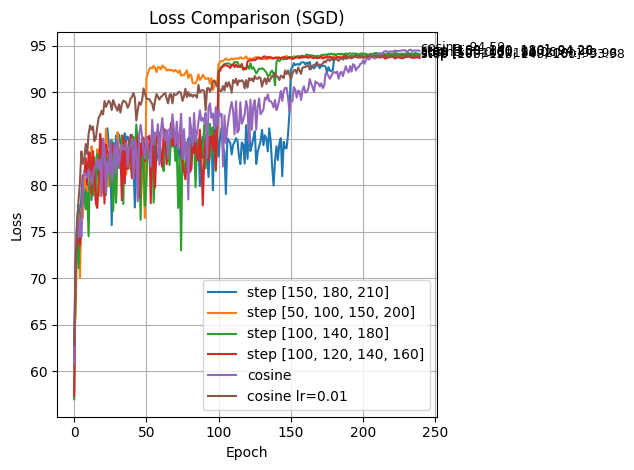

In [10]:
# tensorboardからデータをとり、グラフ描画

from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

# 比較したいファイルとラベルのリスト
files = {
    "step [150, 180, 210]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64",
    "step [50, 100, 150, 200]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_step_ep_[50, 100, 150, 200]",
    "step [100, 140, 180]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_step_ep_[100, 140, 180]",
    "step [100, 120, 140, 160]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_step_ep_[100, 120, 140, 160]",
    "cosine": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine",
    "cosine lr=0.01": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01",

}

# files = {
#     "step [150, 180, 210]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_step_ep_[150, 180, 210]",
#     "step [100, 140, 180]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_step_ep_[100, 140, 180]",
#     "step [100, 120, 140, 160]": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_step_ep_[100, 120, 140, 160]",
#     "cosine": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_cosine",
#     "constant lr=0.05": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_constant_lr_0.05",
#     "constant lr=0.01": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_adam_lr_she_constant_lr_0.01",

# }


# グラフ描画
for label, path in files.items():
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    # ログファイルのパスを指定（ログディレクトリか、eventファイルを直接）
    ea = event_accumulator.EventAccumulator(path)
    ea.Reload() 
    acc_test = ea.Scalars('test/acc')
    steps = [x.step for x in acc_test]
    acc = [x.value for x in acc_test]
    # steps = steps[150:]
    # acc = acc[150:]
    plt.plot(acc, label=label)
    # 各系列の最大値を注記（オプション）
    max_acc = max(acc)
    max_epoch = acc.index(max_acc) + 1
    plt.text(len(acc), acc[-1], f"{label}: {max_acc:.2f}", fontsize=9)

# グラフ整形
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison (SGD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# thensorboard

In [1]:
col = ['#377eb8', '#e41a1c', '#4daf4a', '#984ea3']

# 比較したいファイルとラベルのリスト
files = {
    "cosine lr=0.05": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine",
    "cosine lr=0.01": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01",
    "cosine lr=0.005": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.005",
    "cosine lr=0.001": "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.001",
}

teacher_pth = "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01"
files = {
    "Base": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
    "Ours-4U": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_uniform-20250815_171800",
    "Ours-11U": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-11-me_mean-red_mean-sgrp_uniform-20250815_181636",
    "Ours-4P": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
}

# ckaベース損失係数初期値
# teacher_pth = "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01"
# files = {
#     "Base": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
#     "Ours-4P(400)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
#     "Ours-4P(200)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_200.0-b_method_constant-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
#     "Ours-4P(10)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_10.0-b_method_constant-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
# }

# teacher_pth = "../save/teachers/tensorboard/vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01"
# files = {
#     "Base": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
#     "Ours-4P(constant)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
#     "Ours-4P(step)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_step-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
#     "Ours-4P(exp)": "../save/students/tensorboard/S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
# }


-- Base --
Scalars: ['train_acc', 'train_loss', 'train_acc_top5', 'learning_rate', 'test_acc', 'test_loss', 'test_acc_top5']
max_acc_test(Base): 94.36000061035156
max_acc_train(Base): 100.0
-- Ours-4U --
Scalars: ['train_acc', 'train_loss', 'train_acc_top5', 'learning_rate', 'test_acc', 'test_loss', 'test_acc_top5']
max_acc_test(Ours-4U): 94.31999969482422
max_acc_train(Ours-4U): 100.0
-- Ours-11U --
Scalars: ['train_acc', 'train_loss', 'train_acc_top5', 'learning_rate', 'test_acc', 'test_loss', 'test_acc_top5']
max_acc_test(Ours-11U): 93.87000274658203
max_acc_train(Ours-11U): 100.0
-- Ours-4P --
Scalars: ['train_acc', 'train_loss', 'train_acc_top5', 'learning_rate', 'test_acc', 'test_loss', 'test_acc_top5']
max_acc_test(Ours-4P): 94.4800033569336
max_acc_train(Ours-4P): 100.0
Scalars: ['train/acc', 'train/loss', 'test/acc', 'test/acc_top5', 'test/loss']
max_acc_test(Teacher): 94.05999755859375


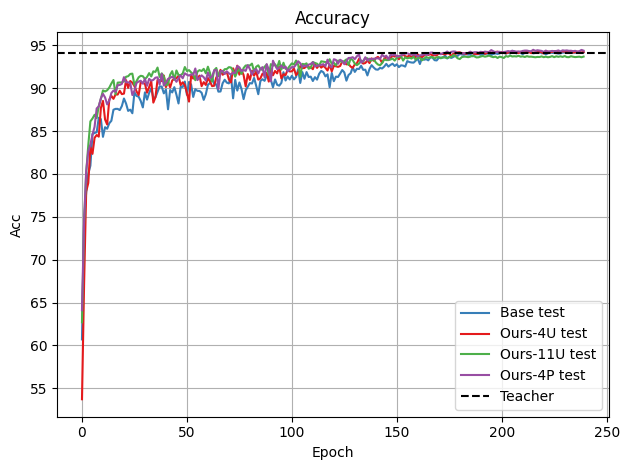

In [2]:
# tensorboardからデータをとり、グラフ描画

from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

zoom = False

# グラフ描画
for idx, (label, path) in enumerate(files.items()):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    # ログファイルのパスを指定（ログディレクトリか、eventファイルを直接）
    print("--", label, "--")
    ea = event_accumulator.EventAccumulator(path)
    ea.Reload() 
    print("Scalars:", ea.Tags()['scalars'])
    acc_test = ea.Scalars('test_acc')
    steps_test = [x.step for x in acc_test]
    acc_test = [x.value for x in acc_test]

    acc_train = ea.Scalars('train_acc')
    steps_train = [x.step for x in acc_train]
    acc_train = [x.value for x in acc_train]

    plt.plot(acc_test, label=label+" test", linestyle = "-", color = col[idx])
    # plt.plot(acc_train, label=label+" train", linestyle = ":", color = col[idx])

    if zoom == True:
        plt.xlim(len(acc_test)-50, len(acc_test))  # 横軸を最後の50エポックに限定
        # plt.xlim(len(acc_train)-50, len(acc_train))  # 横軸を最後の50エポックに限定
        


    # 各系列の最大値
    max_acc_test = max(acc_test)
    print("max_acc_test({}): {}".format(label, max_acc_test))
    max_epoch = acc_test.index(max_acc_test) + 1
    # plt.text(len(acc_test), acc_test[-1], f"{label}: {max_acc_test:.2f}", fontsize=9)  
    max_acc_train = max(acc_train)
    print("max_acc_train({}): {}".format(label, max_acc_train))
    max_epoch = acc_train.index(max_acc_train) + 1
    # plt.text(len(acc_train), acc_train[-1], f"{label}: {max_acc_train:.2f}", fontsize=9)  

# 教師
if not os.path.exists(teacher_pth):
    print(f"File not found: {teacher_pth}")
# ログファイルのパスを指定（ログディレクトリか、eventファイルを直接）
ea = event_accumulator.EventAccumulator(teacher_pth)
ea.Reload() 
print("Scalars:", ea.Tags()['scalars'])
acc_test = ea.Scalars('test/acc')
acc_test = [x.value for x in acc_test]
max_acc_test = max(acc_test)
print("max_acc_test({}): {}".format('Teacher', max_acc_test))
plt.axhline(y=max_acc_test, color="#000000", linestyle='--', label='Teacher')

# グラフ整形
if zoom == True:
    plt.ylim(90,100)   
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
print("-- Ours-4P(200) --")
print("Tags:", ea.Tags())


-- Ours-4P(200) --
Tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


# csv

In [ ]:
import os

col = ['#377eb8', '#e41a1c', '#4daf4a', '#984ea3']

# teacher_pth = os.path.join("..", "save", "teachers", "tensorboard",
#                            "vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01")
# root = os.path.join("..", "save", "students", "models")
# files = {
#     "Base": "S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
#     "Ours-4U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_uniform-20250815_171800",
#     "Ours-11U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-11-me_mean-red_mean-sgrp_uniform-20250815_181636",
#     "Ours-4P": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
# }

# # root を付けてフルパス化
# files = {k: os.path.join(root, v) for k, v in files.items()}

# ckaベース損失係数初期値
# teacher_pth = os.path.join("..", "save", "teachers", "tensorboard",
#                            "vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01")
# root = os.path.join("..", "save", "students", "models")
# files = {
#     "Base": "S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
#     "Ours-4P(400)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
#     "Ours-4P(200)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_200.0-b_method_constant-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
#     "Ours-4P(10)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_10.0-b_method_constant-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
# }

# files = {k: os.path.join(root, v) for k, v in files.items()}

# ckaベース損失係数動的変化
# teacher_pth = os.path.join("..", "save", "teachers", "tensorboard",
#                            "vgg13_vanilla_cifar10_trial_0_epochs_240_bs_64_opt_sgd_lr_she_cosine_lr_0.01")
# root = os.path.join("..", "save", "students", "models")
# files = {
#     "Base": "S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-0-20250815_163618",
#     "Ours-4P(constant)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250815_190217",
#     "Ours-4P(step)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_step-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
#     "Ours-4P(exp)": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250818",
# }
# files = {k: os.path.join(root, v) for k, v in files.items()}

# 
# teacher_pth = os.path.join("..", "save", "teachers", "models",
#                            "vgg13-vanilla-cifar100-trial_0-epochs_240-bs_64-20250816")
# root = os.path.join("..", "save", "students", "models")
# files = {
#     "Base": "S_vgg13-T_vgg13-cifar100-kd-r_1.0-a_1.0-b_400.0-0-20250816",
#     "Ours-4P(400)": "S_vgg13-T_vgg13-cifar100-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250825",
#     "Ours-4P(200)": "S_vgg13-T_vgg13-cifar100-ckad-r_1.0-a_1.0-b_200.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250825",
#     "Ours-4P(10)": "S_vgg13-T_vgg13-cifar100-ckad-r_1.0-a_1.0-b_10.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250825",
# }
# files = {k: os.path.join(root, v) for k, v in files.items()}

teacher_pth = os.path.join("..", "save", "teachers", "models",
                           "vgg13-vanilla-cifar10-trial_0-epochs_240-bs_64-20250903")
root = os.path.join("..", "save", "students", "models")
files = {
    "Base": "S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-b_method_exp-0-20250903",
    "Ours-4U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_uniform-20250903",
    "Ours-11U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-11-me_mean-red_mean-sgrp_uniform-20250903",
    "Ours-4P": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional-20250903",
}
files = {k: os.path.join(root, v) for k, v in files.items()}

In [2]:
from tensorboard.backend.event_processing import event_accumulator
import json
import os

def load_data(path, test_or_train):
    acc = None
    if "models" in path:
        file = test_or_train + "_acc_history.json"
        path = os.path.join(path, file)
        # JSONファイルを読み込む
        with open(path, "r") as f:
            data = json.load(f)
        # "test_acc" のリストを取得
        acc = data["test_acc"]
    elif "tensorboard" in path:
        ea = event_accumulator.EventAccumulator(path)
        ea.Reload() 
        # print("Scalars:", ea.Tags()['scalars'])
        tags = ["_acc", "/acc"]
        tags = [test_or_train + t for t in tags]
        for tag in tags:
            if tag in ea.Tags()["scalars"]:
                acc = ea.Scalars(tag)
                acc = [x.value for x in acc]
                break
    return acc

-- Base --
max_acc_test(Base): 94.43
-- Ours-4U --
max_acc_test(Ours-4U): 94.49
-- Ours-11U --
max_acc_test(Ours-11U): 94.3
-- Ours-4P --
max_acc_test(Ours-4P): 94.59
Scalars: []
--teacher--
max_acc_test(Teacher): 94.59


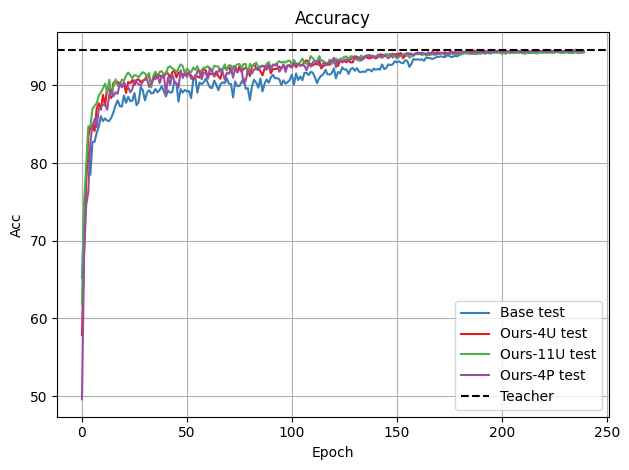

In [4]:
# tensorboardからデータをとり、グラフ描画
import matplotlib.pyplot as plt
import os

zoom = False
plot_test = True
plot_train = False

# グラフ描画
for idx, (label, path) in enumerate(files.items()):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    # ログファイルのパスを指定（ログディレクトリか、eventファイルを直接）
    print("--", label, "--")
    
    if plot_test:
        acc_test = load_data(path, "test")
        # print(acc_test)
        plt.plot(acc_test, label=label+" test", linestyle = "-", color = col[idx])
        if zoom == True:
            plt.xlim(len(acc_test)-50, len(acc_test))  # 横軸を最後の50エポックに限定
        # 各系列の最大値
        max_acc_test = max(acc_test)
        print("max_acc_test({}): {}".format(label, max_acc_test))
        max_epoch = acc_test.index(max_acc_test) + 1
        # plt.text(len(acc_test), acc_test[-1], f"{label}: {max_acc_test:.2f}", fontsize=9)     
         
    if plot_train:
        acc_train = load_data(path, "test")
        plt.plot(acc_train, label=label+" train", linestyle = ":", color = col[idx])
        if zoom == True:
            plt.xlim(len(acc_train)-50, len(acc_train))  # 横軸を最後の50エポックに限定
        # 各系列の最大値
        max_acc_train = max(acc_train)
        print("max_acc_train({}): {}".format(label, max_acc_train))
        max_epoch = acc_train.index(max_acc_train) + 1
        # plt.text(len(acc_train), acc_train[-1], f"{label}: {max_acc_train:.2f}", fontsize=9)  
        

# 教師
if not os.path.exists(teacher_pth):
    print(f"File not found: {teacher_pth}")
# ログファイルのパスを指定（ログディレクトリか、eventファイルを直接）
ea = event_accumulator.EventAccumulator(teacher_pth)
ea.Reload() 
print("Scalars:", ea.Tags()['scalars'])
if len(ea.Tags()['scalars']) == 0:
    file = "test_best_metrics.json"
    path = os.path.join(path, file)
    # JSONファイルを読み込む
    with open(path, "r") as f:
        data = json.load(f)
    # "test_acc" のリストを取得
    acc = data["test_acc"]
    max_acc_test = max(acc_test)
else:
    acc_test = ea.Scalars('test_acc')
    acc_test = [x.value for x in acc_test]
    max_acc_test = max(acc_test)
print("--teacher--")
print("max_acc_test({}): {}".format('Teacher', max_acc_test))
plt.axhline(y=max_acc_test, color="#000000", linestyle='--', label='Teacher')

# グラフ整形
if zoom == True:
    plt.ylim(70,80)   
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 精度の平均値

In [20]:
from tensorboard.backend.event_processing import event_accumulator
import json
import os

def load_data(path, test_or_train):
    acc = None
    if "models" in path:
        file = test_or_train + "_acc_history.json"
        path = os.path.join(path, file)
        # JSONファイルを読み込む
        with open(path, "r") as f:
            data = json.load(f)
        # "test_acc" のリストを取得
        acc = data["test_acc"]
    elif "tensorboard" in path:
        ea = event_accumulator.EventAccumulator(path)
        ea.Reload() 
        # print("Scalars:", ea.Tags()['scalars'])
        tags = ["_acc", "/acc"]
        tags = [test_or_train + t for t in tags]
        for tag in tags:
            if tag in ea.Tags()["scalars"]:
                acc = ea.Scalars(tag)
                acc = [x.value for x in acc]
                break
    return acc

In [15]:
import os

folder = os.path.join("..", "save", "students", "models")
model_dir = {
    "Base": "S_vgg13-T_vgg13-cifar10-kd-r_1.0-a_1.0-b_400.0-b_method_exp-0",
    "Ours-4U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_uniform",
    "Ours-11U": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-11-me_mean-red_mean-sgrp_uniform",
    "Ours-4P": "S_vgg13-T_vgg13-cifar10-ckad-r_1.0-a_1.0-b_400.0-b_method_exp-0-Distill_gn-4-me_mean-red_mean-sgrp_proportional",
}

# フォルダ内の全ファイル
all_files = os.listdir(folder)

# 各 value をリストに置き換える
for key in model_dir:
    prefix = model_dir[key]
    model_dir[key] = [os.path.join(folder, f) for f in all_files if f.startswith(prefix)]

# 確認
for key, files in model_dir.items():
    print(f"{key}: {len(files)} files")

Base: 7 files
Ours-4U: 7 files
Ours-11U: 7 files
Ours-4P: 7 files


In [22]:
# 結果を格納する辞書
max_acc_dict = {}
avg_max_acc_dict = {}

for key, paths in model_dir.items():
    # 各ファイルの test データ精度リストを取得
    acc_lists = [load_data(path, "test") for path in paths]
    
    # 各ファイルの最大精度
    max_acc_list = [max(acc) for acc in acc_lists]
    max_acc_dict[key] = max_acc_list
    
    # そのキーの全ファイルの最大精度平均
    avg_max_acc_dict[key] = sum(max_acc_list) / len(max_acc_list)

# 確認
for key in model_dir.keys():
    print(f"{key}: max per file = {max_acc_dict[key]}, avg max = {avg_max_acc_dict[key]:.4f}")


Base: max per file = [94.43, 94.38, 94.4, 94.45, 94.37, 94.61, 94.32], avg max = 94.4229
Ours-4U: max per file = [94.49, 94.35, 94.59, 94.18, 94.14, 94.42, 94.14], avg max = 94.3300
Ours-11U: max per file = [94.3, 94.29, 94.38, 94.29, 94.29, 94.36, 94.55], avg max = 94.3514
Ours-4P: max per file = [94.54, 94.59, 94.6, 94.39, 94.44, 94.45, 94.48], avg max = 94.4986
